In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [3]:
df_spain = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Spain')].copy()

df_spain = df_spain.dropna(subset=['salary_year_avg'])

In [5]:
df_spain = df_spain.explode('job_skills')
df_spain['job_skills']

17710           None
32177            sql
32177         python
32177              r
32177     databricks
             ...    
782773             r
782773     snowflake
782773    databricks
782773       airflow
782773       tableau
Name: job_skills, Length: 113, dtype: object

In [25]:
df_spain_group = df_spain.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_spain_toppay = df_spain_group.sort_values(by='median', ascending=False).head(10)
df_spain_skillcount = df_spain_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False).head(10)

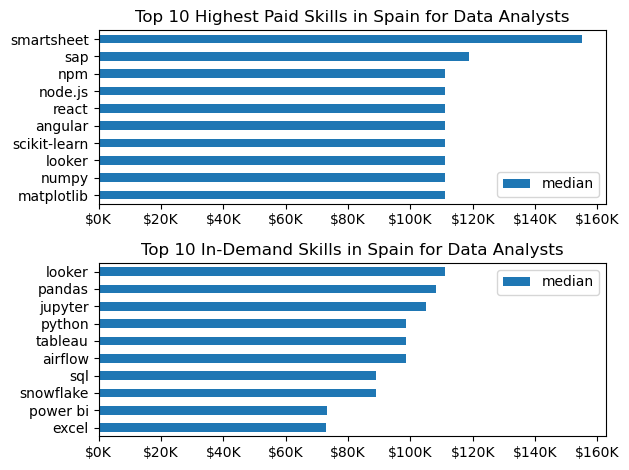

In [27]:
fig, ax = plt.subplots(2,1)

df_spain_toppay.plot(kind='barh', y='median', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Top 10 Highest Paid Skills in Spain for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))

df_spain_skillcount.plot(kind='barh', y='median', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Top 10 In-Demand Skills in Spain for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())
plt.tight_layout()